Methods to apply Classification on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Is Complex Variables better at 4 class problems (Not boolean)    
* Method to convert a Complex Number to a Boolean.  
    Maybe by converting to polar format.  


Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_classification import \
    LinearClassification, ComplexLinearClassification
import math
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [38]:
X, y = make_blobs(
    n_samples = 2000,
    n_features = 2, 
    centers = 5)

In [39]:
y = y%2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

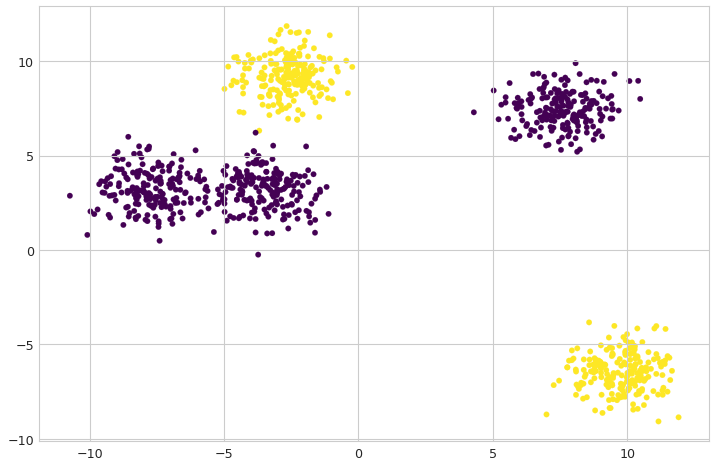

In [40]:
# Training data
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)

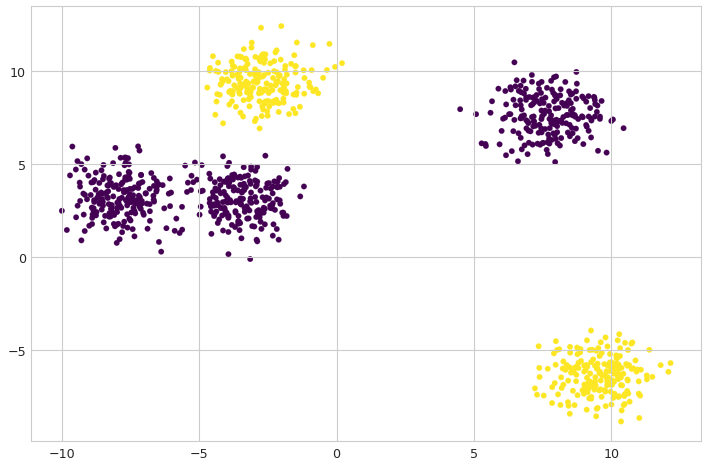

In [41]:
# Test data
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = y_test)

## Complex Valued Linear Classification

In [42]:
# Manifold
X_train_ = np.array([i+i*1j for i in X_train])
X_test_ = np.array([j+j*1j for j in X_test])

In [43]:
clc = ComplexLinearClassification(n_iter=10000)

clc.fit(X_train_, y_train)

  0%|          | 0/10000 [00:00<?, ?it/s]/mnt/c/ubuntu20.04/projects/complex_machine_learning/linear_classification.py:101: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*z.imag/z.real))
100%|██████████| 10000/10000 [00:52<00:00, 190.45it/s]


In [44]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y_test == clc.predict(X_test_))*100/len(y_test)}")

Loss: 0.0050952889052149905
Percentage mapped correctly: 98.9


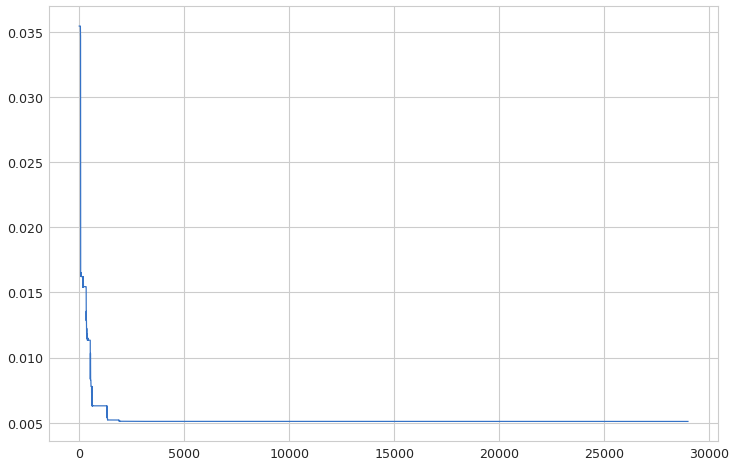

In [45]:
# Plot loss
plt.plot(clc.loss[1000:])

/home/daire/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


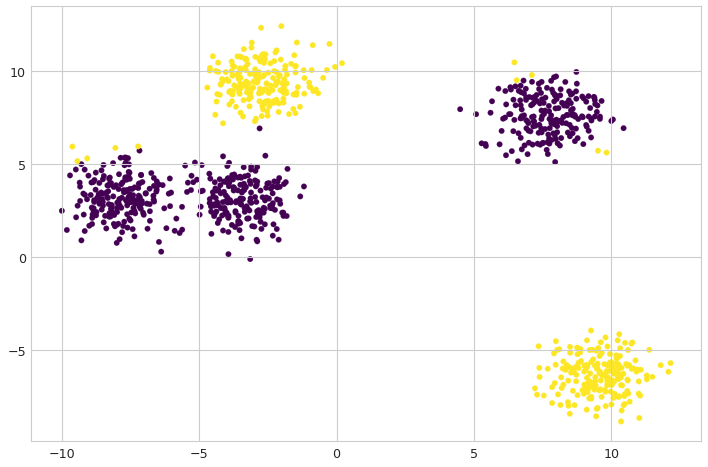

In [46]:
plt.scatter(x = X_test_[:,0], y = X_test_[:,1], c = clc.predict(X_test_))

In [47]:
# Plot gradient path of variables
#history = clc.weights_history
#for j in range(history[0].shape[0]):
#    print(f"{j} dimension path, with step count.")
#    sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
#    plt.show()
#    print("")

## Real Valued Linear Classification

In [48]:
lc = LinearClassification(alpha = 0.005, n_iter=10000, stochastic = False)

lc.fit(X_train, y_train)

100%|██████████| 10000/10000 [00:17<00:00, 582.21it/s]


In [49]:
print(f"Loss: {lc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y_test == lc.predict(X_test))*100/len(y_test)}")

Loss: 0.20024583150449596
Percentage mapped correctly: 79.2


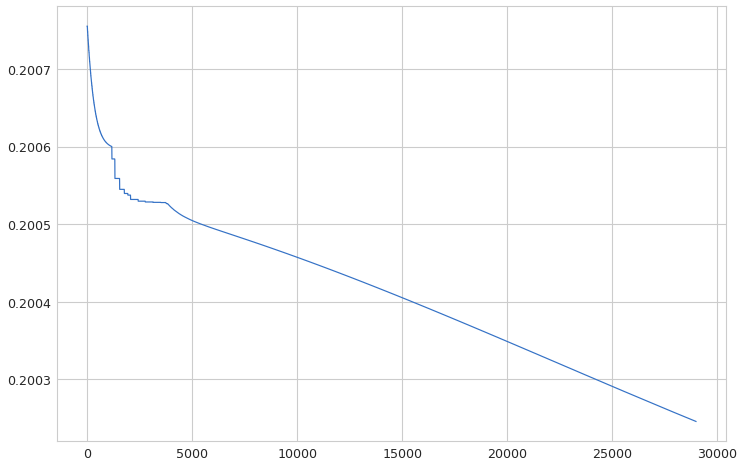

In [50]:
# Plot loss
plt.plot(lc.loss[1000:])

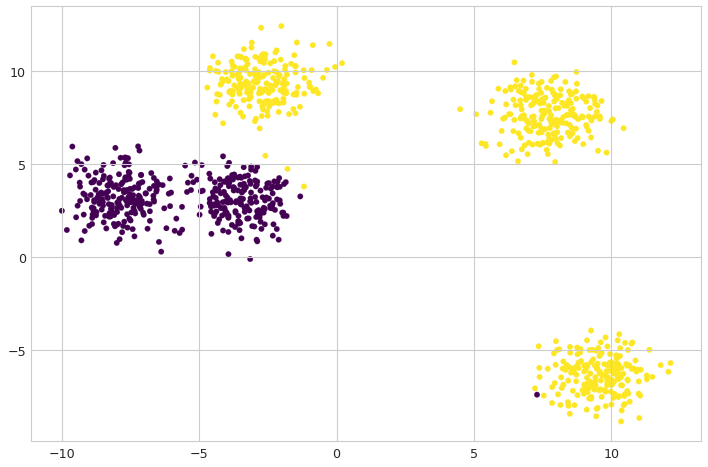

In [51]:
plt.scatter(x = X_test[:,0], y = X_test[:,1], c = lc.predict(X_test))

In [52]:
# Plot gradient path of variables
#history = lc.weights_history
#for j in range(history[0].shape[0]):
#    print(f"{j} dimension path, with step count.")
#    sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
#    plt.show()
#    print("")

## Sklearn Logestic Regression

Loss: 0.0050952889052149905
Percentage mapped correctly: 75.6


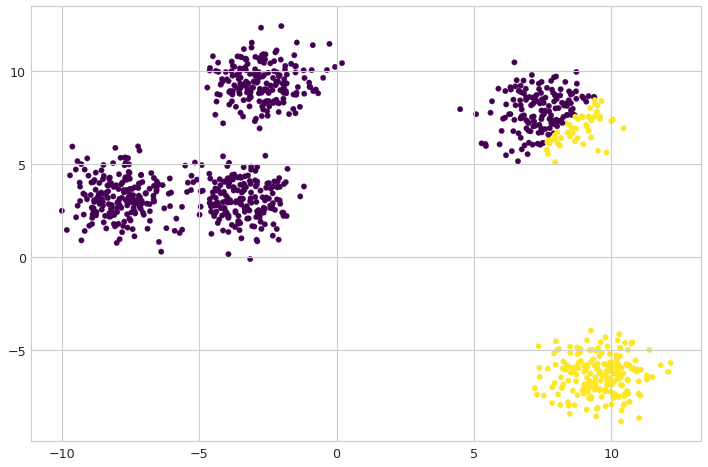

In [53]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

log_r.fit(X_train, y_train)

print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y_test == log_r.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = log_r.predict(X_test))

# Compare to non-linear Classifier

### SGDClassifier (... this is linear)

Percentage mapped correctly: 19.8


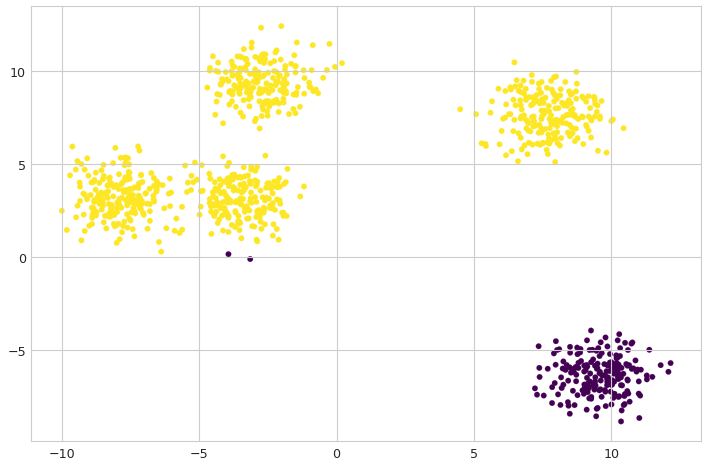

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier()

sgd_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == sgd_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = sgd_c.predict(X_test))

### MLPClassifier

Percentage mapped correctly: 99.8


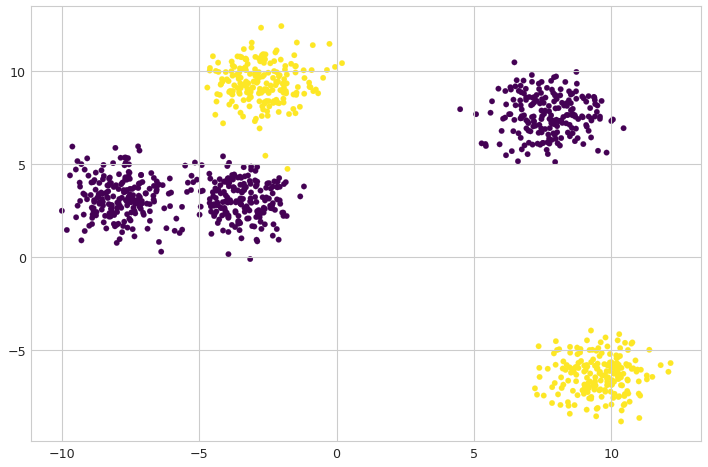

In [55]:
from sklearn.neural_network import MLPClassifier
mlp_c = MLPClassifier()

mlp_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == mlp_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = mlp_c.predict(X_test))

### SVM

Percentage mapped correctly: 100.0


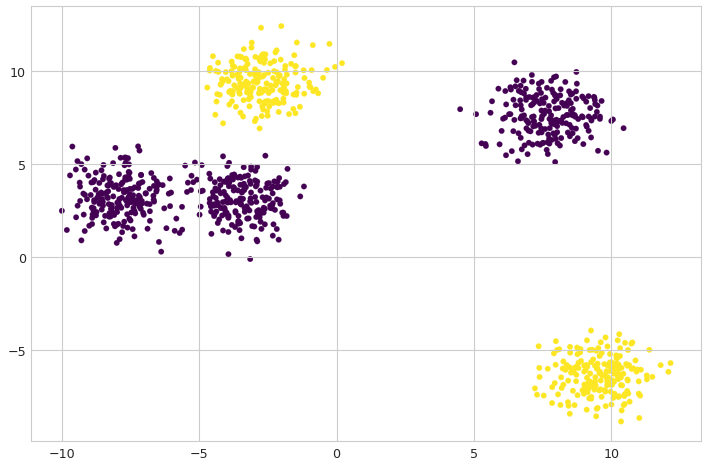

In [56]:
from sklearn.svm import SVC
svm_c = SVC()

svm_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == svm_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = svm_c.predict(X_test))

### RandomForestClassifier

Percentage mapped correctly: 100.0


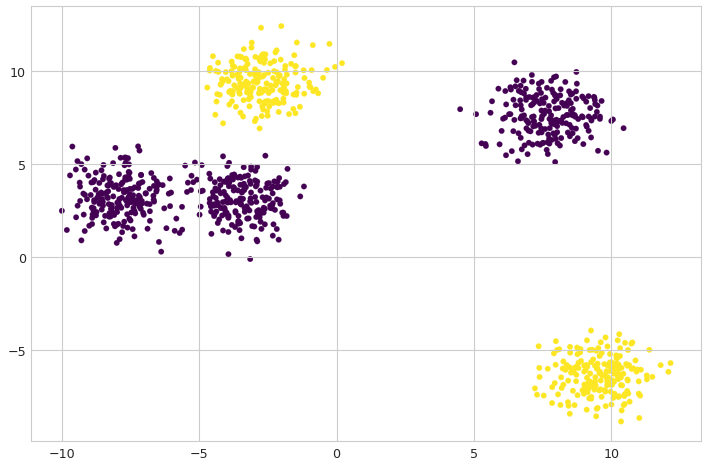

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()

rf_c.fit(X_train, y_train)

print(f"Percentage mapped correctly: {sum(y_test == rf_c.predict(X_test))*100/len(y_test)}")

plt.scatter(x = X_test[:,0], y = X_test[:,1], c = rf_c.predict(X_test))

(-1+0j)